In [1]:
# Import Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
session = Session(engine)

In [8]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [9]:
results = []
results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

), ('2014-12-10', 0.0), ('2014-12-11', 1.09), ('2014-12-12', 0.83), ('2014-12-13', 0.0), ('2014-12-14', 1.75), ('2014-12-15', 0.55), ('2014-12-16', 0.58), ('2014-12-17', 0.8), ('2014-12-18', 0.21), ('2014-12-19', 0.51), ('2014-12-21', None), ('2014-12-22', 0.59), ('2014-12-23', 4.03), ('2014-12-24', 0.4), ('2014-12-25', 0.03), ('2014-12-26', 0.0), ('2014-12-27', 0.0), ('2014-12-28', 0.0), ('2014-12-29', 0.0), ('2015-01-01', None), ('2015-01-02', 0.02), ('2015-01-03', 0.85), ('2015-01-04', 0.02), ('2015-01-05', 0.0), ('2015-01-06', 0.06), ('2015-01-07', 0.0), ('2015-01-08', 0.0), ('2015-01-09', 0.0), ('2015-01-11', None), ('2015-01-12', 0.03), ('2015-01-13', 0.01), ('2015-01-14', 0.0), ('2015-01-15', 0.0), ('2015-01-16', 0.01), ('2015-01-17', 0.0), ('2015-01-18', 0.0), ('2015-01-19', 0.0), ('2015-01-20', 0.01), ('2015-01-21', 0.0), ('2015-01-22', 0.0), ('2015-01-23', 0.0), ('2015-01-24', 0.22), ('2015-01-25', 0.33), ('2015-01-26', 0.29), ('2015-01-31', None), ('2015-02-02', None), ('201

In [10]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

, ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.16), ('2016-12-18', 0.27), ('2016-12-19', 0.02), ('2016-12-20', 0.01), ('2016-12-21', 0.06), ('2016-12-22', 0.14), ('2016-12-23', 0.02), ('2016-12-24', 0.06), ('2016-12-25', 0.0), ('2016-12-26', 0.06), ('2016-12-27', 0.0), ('2016-12-28', 0.06), ('2016-12-29', 0.05), ('2016-12-30', 0.07), ('2017-01-01', None), ('2017-01-03', None), ('2017-01-04', 0.18), ('2017-01-05', 0.42), ('2017-01-06', 0.01), ('2017-01-07', 0.0), ('2017-01-08', 0.0), ('2017-01-09', 0.0), ('2017-01-10', 0.0), ('2017-01-12', None), ('2017-01-15', None), ('2017-01-16', 0.0), ('2017-01-18', None), ('2017-01-19', 0.0), ('2017-01-20', 0.0), ('2017-01-21', 0.11), ('2017-01-22', 0.04), ('2017-01-23', 0.0), ('2017-01-24', 0.08), ('2017-01-25', 0.0), ('2017-01-26', 0.0), ('2017-01-27', 0.0), ('2017-01-29', None), ('2017-01-30', 0.0), ('2017-01-31', 0.0), ('2017-02-01', 0.0), ('2017-02-02', 0.0), ('2017-02-03', 0.0), ('2017-02-04', 0.0), ('2017-02-05', 0.0), ('2017-0

In [11]:
df = pd.DataFrame(results, columns=['date','percipitation'])
df

,date,percipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [12]:
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

 0.00
2017-06-09           0.00
2017-06-10           0.13
2017-06-11           0.25
2017-06-12           0.14
2017-06-13           0.03
2017-06-14           0.06
2017-06-15           0.00
2017-06-16           0.00
2017-06-17           0.00
2017-06-18           0.00
2017-06-19           0.01
2017-06-21            NaN
2017-06-22           0.00
2017-06-23           0.05
2017-06-24           0.00
2017-06-25           0.00
2017-06-26           0.00
2017-06-27           0.00
2017-06-28           0.00
2017-06-29           0.00
2017-06-30           0.07
2017-07-02            NaN
2017-07-03           0.02
2017-07-05            NaN
2017-07-06           0.00
2017-07-07           0.00
2017-07-08           0.00
2017-07-09           0.00
2017-07-10           0.00
2017-07-11           0.00
2017-07-12           0.00
2017-07-13           0.11
2017-07-14           0.00
2017-07-15           0.00
2017-07-16           0.00
2017-07-17           0.00
2017-07-18           0.00
2017-07-19           0.00
2017-0

In [13]:
df = df.sort_index()

In [14]:
print(df.to_string(index=False))

 0.00
2017-04-12           0.03
2017-04-12           0.65
2017-04-12           0.11
2017-04-12           0.00
2017-04-12           0.29
2017-04-12            NaN
2017-04-13            NaN
2017-04-13           0.23
2017-04-13           0.27
2017-04-13           0.00
2017-04-13           0.59
2017-04-13           0.00
2017-04-13           0.00
2017-04-14           0.36
2017-04-14           0.69
2017-04-14           2.30
2017-04-14           0.26
2017-04-14           2.82
2017-04-14           0.29
2017-04-15           0.90
2017-04-15           0.01
2017-04-15           0.00
2017-04-15           0.38
2017-04-15           0.45
2017-04-16           0.49
2017-04-16           0.47
2017-04-16           0.11
2017-04-16           0.00
2017-04-16           0.00
2017-04-17           0.30
2017-04-17           1.30
2017-04-17           0.41
2017-04-17            NaN
2017-04-17           0.02
2017-04-17            NaN
2017-04-17           1.04
2017-04-18           0.98
2017-04-18           0.15
2017-0

<AxesSubplot:xlabel='date'>

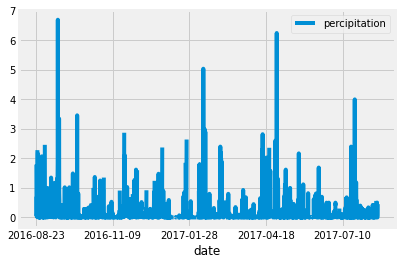

In [15]:
df.plot()

In [16]:
df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
session.query(func.count(Station.station)).all()

[(9)]

In [18]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [20]:
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [21]:
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


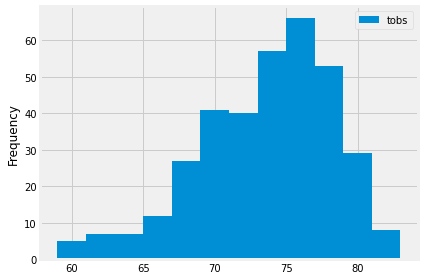

In [22]:
df.plot.hist(bins=12)
plt.tight_layout()